In [1]:
import pandas as pd
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
all_songs= pd.read_csv("all_songs.csv")


In [3]:
all_songs.head()

,id,titles,artists,danceability,energy,acousticness,instrumentalness,tempo,dataset
0,3k79jB4aGmMDUQzEwa46Rz,Vampire,Olivia Rodrigo,0.511,0.532,0.1690,0.000000,137.827,H
1,59uQI0PADDKeE6UZDTJEe8,Last Night,Morgan Wallen,0.517,0.675,0.4590,0.000000,203.853,H
2,1Lo0QY9cvc8sUB2vnIOxDT,Fast Car,Luke Combs,0.712,0.603,0.1860,0.000000,97.994,H
3,0WtM2NBVQNNJLh6scP13H8,Calm Down,Rema & Selena Gomez,0.801,0.806,0.3820,0.000669,106.999,H
4,0yLdNVWF3Srea0uzk55zFn,Flowers,Miley Cyrus,0.707,0.681,0.0632,0.000005,117.999,H


In [4]:
all_songs.tail()

,id,titles,artists,danceability,energy,acousticness,instrumentalness,tempo,dataset
3092,2fF7GJuSEreCCeoS0JvQeA,Jeu de cartes (The Card Game): Premiere donne ...,Igor Stravinsky and Concertgebouworkest and ...,0.395,0.0533,0.975000,0.96000,115.798,N
3093,5hChlLhi5sFiGMg5gr5dmB,Con Alma,Willie Jones III,0.444,0.4170,0.826000,0.90600,96.696,N
3094,7myqme27X7uehPigGKJlJ0,Pickin' Up the Pieces,Poco,0.551,0.6570,0.251000,0.00000,85.255,N
3095,7ksuoVBBquy1bP0Q4ii5T3,Multiphonic,DJ Spooky and Rob Swift,0.692,0.9440,0.000801,0.00807,108.002,N
3096,7MDUI33ms2fjyoHgiHsMCM,Outside Looking In (with Richie McDonald),Kellie Coffey and Richie McDonald,0.443,0.3260,0.648000,0.00000,131.650,N


In [5]:
all_songs.shape

(3097, 9)

In [6]:
all_songs.describe()

,danceability,energy,acousticness,instrumentalness,tempo
count,3097.000000,3097.000000,3097.000000,3097.000000,3097.000000
mean,0.499538,0.530311,0.422656,0.269353,118.410901
std,0.190936,0.291970,0.381669,0.372679,30.666915
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360000,0.273000,0.027600,0.000003,94.190000
50%,0.511000,0.565000,0.341000,0.005430,117.962000
75%,0.640000,0.782000,0.833000,0.696000,137.761000
max,0.976000,0.999000,0.996000,0.993000,211.537000


In [7]:
all_songs2 = all_songs.copy()

In [8]:
all_songs2 = all_songs2.drop(columns=['id', 'titles', 'artists', 'dataset'])

print(all_songs2)


      danceability  energy  acousticness  instrumentalness    tempo
0            0.511  0.5320      0.169000          0.000000  137.827
1            0.517  0.6750      0.459000          0.000000  203.853
2            0.712  0.6030      0.186000          0.000000   97.994
3            0.801  0.8060      0.382000          0.000669  106.999
4            0.707  0.6810      0.063200          0.000005  117.999
...            ...     ...           ...               ...      ...
3092         0.395  0.0533      0.975000          0.960000  115.798
3093         0.444  0.4170      0.826000          0.906000   96.696
3094         0.551  0.6570      0.251000          0.000000   85.255
3095         0.692  0.9440      0.000801          0.008070  108.002
3096         0.443  0.3260      0.648000          0.000000  131.650

[3097 rows x 5 columns]


In [12]:
import pickle

scaler =StandardScaler()
scaler.fit(all_songs2)
all_songs2_scaled =scaler.transform(all_songs2)
All_songs = "scaler.pickle"

with open(All_songs, "wb") as file:
        pickle.dump(scaler,file)
        
all_songs2_scaled_df = pd.DataFrame(all_songs2_scaled, columns = all_songs2.columns)
display(all_songs2.head())

display(all_songs2_scaled_df.head())


,danceability,energy,acousticness,instrumentalness,tempo
0,0.511,0.532,0.1690,0.000000,137.827
1,0.517,0.675,0.4590,0.000000,203.853
2,0.712,0.603,0.1860,0.000000,97.994
3,0.801,0.806,0.3820,0.000669,106.999
4,0.707,0.681,0.0632,0.000005,117.999


,danceability,energy,acousticness,instrumentalness,tempo
0,0.060038,0.005785,-0.664705,-0.722866,0.633231
1,0.091467,0.495640,0.095238,-0.722866,2.786583
2,1.112916,0.249000,-0.620156,-0.722866,-0.665871
3,1.579116,0.944388,-0.106540,-0.721070,-0.372184
4,1.086725,0.516193,-0.941953,-0.722852,-0.013434


In [13]:
all_songs2_scaled_df.describe()

,danceability,energy,acousticness,instrumentalness,tempo
count,3.097000e+03,3.097000e+03,3.097000e+03,3.097000e+03,3.097000e+03
mean,-1.238919e-16,3.762642e-16,2.294294e-17,-4.588587e-17,8.030028e-17
std,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00
min,-2.616681e+00,-1.816611e+00,-1.107568e+00,-7.228655e-01,-3.861817e+00
25%,-7.309298e-01,-8.814342e-01,-1.035242e+00,-7.228567e-01,-7.899332e-01
50%,6.003818e-02,1.188284e-01,-2.139802e-01,-7.082930e-01,-1.464033e-02
75%,7.357658e-01,8.621743e-01,1.075302e+00,1.144995e+00,6.310783e-01
max,2.495801e+00,1.605520e+00,1.502442e+00,1.942057e+00,3.037186e+00


Training a K-Means model with 13 clusters! 

Initialization complete
Iteration 0, inertia 5260.149401789491.
Iteration 1, inertia 4431.133264883349.
Iteration 2, inertia 4163.337790564273.
Iteration 3, inertia 3939.6071925363162.
Iteration 4, inertia 3853.7108704674133.
Iteration 5, inertia 3822.309557179606.
Iteration 6, inertia 3804.528505611276.
Iteration 7, inertia 3790.411070259729.
Iteration 8, inertia 3782.911289061638.
Iteration 9, inertia 3779.8948539079884.
Iteration 10, inertia 3778.39475086767.
Iteration 11, inertia 3776.9876807512355.
Iteration 12, inertia 3775.968358359381.
Iteration 13, inertia 3774.4518217707564.
Iteration 14, inertia 3772.588257677082.
Iteration 15, inertia 3770.8399709269506.
Iteration 16, inertia 3768.6413493307923.
Iteration 17, inertia 3767.96815131702.
Iteration 18, inertia 3767.079028445271.
Iteration 19, inertia 3765.232532590982.
Iteration 20, inertia 3762.577390793802.
Iteration 21, inertia 3758.1719682366224.
Iteration 22, inertia 3749.837100

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 13, inertia 3742.1233067921376.
Iteration 14, inertia 3741.037717588021.
Iteration 15, inertia 3740.0300816691506.
Iteration 16, inertia 3738.7608970531164.
Iteration 17, inertia 3738.1656845955213.
Iteration 18, inertia 3738.0265920805805.
Iteration 19, inertia 3737.9564101276637.
Converged at iteration 19: center shift 8.954670140663258e-05 within tolerance 0.00010000000000000005.
Initialization complete
Iteration 0, inertia 5075.791163528533.
Iteration 1, inertia 4149.220286554226.
Iteration 2, inertia 3926.957284355769.
Iteration 3, inertia 3849.932713409128.
Iteration 4, inertia 3819.595488981704.
Iteration 5, inertia 3800.5564911444335.
Iteration 6, inertia 3784.9064521837736.
Iteration 7, inertia 3770.9695895699133.
Iteration 8, inertia 3762.0304378819146.
Iteration 9, inertia 3756.8524061183043.
Iteration 10, inertia 3753.0764885408585.
Iteration 11, inertia 3751.58028697188.
Iteration 12, inertia 3750.0824256859955.
Iteration 13, inertia 3748.6878405855523.
Iteration

Training a K-Means model with 14 clusters! 

Initialization complete
Iteration 0, inertia 4845.628640935505.
Iteration 1, inertia 4095.844305977315.
Iteration 2, inertia 3884.760415412205.
Iteration 3, inertia 3797.427462452768.
Iteration 4, inertia 3756.594737924481.
Iteration 5, inertia 3727.4399991263886.
Iteration 6, inertia 3708.598398672112.
Iteration 7, inertia 3693.8232330680103.
Iteration 8, inertia 3683.9707553753933.
Iteration 9, inertia 3678.4370990388948.
Iteration 10, inertia 3674.9326610571047.
Iteration 11, inertia 3670.854709226631.
Iteration 12, inertia 3666.503461520547.
Iteration 13, inertia 3663.9158354460633.
Iteration 14, inertia 3661.80179361914.
Iteration 15, inertia 3660.1363520994632.
Iteration 16, inertia 3658.702406807945.
Iteration 17, inertia 3658.0190559211514.
Iteration 18, inertia 3657.248045588565.
Iteration 19, inertia 3656.6139777242606.
Iteration 20, inertia 3655.8721079863703.
Iteration 21, inertia 3655.0718732908.
Iteration 22, inertia 3653.71160

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 18, inertia 3606.132167881522.
Iteration 19, inertia 3605.4908231330855.
Iteration 20, inertia 3605.0694939311875.
Iteration 21, inertia 3604.7156215876994.
Iteration 22, inertia 3604.6402815474125.
Iteration 23, inertia 3604.557098765791.
Iteration 24, inertia 3604.432437738729.
Iteration 25, inertia 3604.3228206109634.
Iteration 26, inertia 3604.236540936583.
Converged at iteration 26: center shift 4.274947086426194e-05 within tolerance 0.00010000000000000005.
Initialization complete
Iteration 0, inertia 4953.273889116932.
Iteration 1, inertia 4207.596225503297.
Iteration 2, inertia 4014.6093802927053.
Iteration 3, inertia 3859.337751326344.
Iteration 4, inertia 3745.5726989613545.
Iteration 5, inertia 3691.4055914993733.
Iteration 6, inertia 3669.9284370174964.
Iteration 7, inertia 3660.338637565475.
Iteration 8, inertia 3653.486837953855.
Iteration 9, inertia 3647.9016914174354.
Iteration 10, inertia 3643.5034517992376.
Iteration 11, inertia 3638.9131268653573.
Iteration 

Iteration 49, inertia 3561.987350148191.
Iteration 50, inertia 3561.85483386527.
Iteration 51, inertia 3561.7586720223444.
Iteration 52, inertia 3561.520537458999.
Iteration 53, inertia 3561.4506419102595.
Iteration 54, inertia 3561.3998915409766.
Converged at iteration 54: center shift 7.590999846196653e-05 within tolerance 0.00010000000000000005.
Initialization complete
Iteration 0, inertia 4918.118102421999.
Iteration 1, inertia 3969.112790114473.
Iteration 2, inertia 3845.084396622109.
Iteration 3, inertia 3793.1611732023684.
Iteration 4, inertia 3769.4775724819847.
Iteration 5, inertia 3749.335398975188.
Iteration 6, inertia 3736.579425634545.
Iteration 7, inertia 3726.459647647362.
Iteration 8, inertia 3720.7966598769303.
Iteration 9, inertia 3717.317660275877.
Iteration 10, inertia 3714.803909721574.
Iteration 11, inertia 3713.4680030879117.
Iteration 12, inertia 3712.2858881499506.
Iteration 13, inertia 3711.5793316155086.
Iteration 14, inertia 3710.8716108018284.
Iteration 15,

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 15, inertia 3498.435786089055.
Iteration 16, inertia 3498.148826707675.
Iteration 17, inertia 3497.788841613014.
Iteration 18, inertia 3497.157820883637.
Iteration 19, inertia 3496.211611872369.
Iteration 20, inertia 3495.0060607020055.
Iteration 21, inertia 3494.2344145148018.
Iteration 22, inertia 3493.633431585275.
Iteration 23, inertia 3492.908473239078.
Iteration 24, inertia 3492.0970148437727.
Iteration 25, inertia 3491.4026370844954.
Iteration 26, inertia 3490.649309377092.
Iteration 27, inertia 3490.071214622665.
Iteration 28, inertia 3489.7604448826623.
Iteration 29, inertia 3489.4925929532883.
Iteration 30, inertia 3489.153447760397.
Iteration 31, inertia 3488.803340218107.
Iteration 32, inertia 3488.312578564538.
Iteration 33, inertia 3487.8865736123735.
Iteration 34, inertia 3487.5661367879948.
Iteration 35, inertia 3487.0645165589362.
Iteration 36, inertia 3485.27180359376.
Iteration 37, inertia 3483.0874246496887.
Iteration 38, inertia 3481.763667101787.
Iterati

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 20, inertia 3389.6602263556015.
Iteration 21, inertia 3388.067635478829.
Iteration 22, inertia 3386.482917900953.
Iteration 23, inertia 3385.201194305109.
Iteration 24, inertia 3383.6706672790524.
Iteration 25, inertia 3382.9260328905093.
Iteration 26, inertia 3381.780799337491.
Iteration 27, inertia 3380.286994221533.
Iteration 28, inertia 3378.042407292338.
Iteration 29, inertia 3376.5713424141773.
Iteration 30, inertia 3375.4173626670818.
Iteration 31, inertia 3374.733925874483.
Iteration 32, inertia 3373.8808462712495.
Iteration 33, inertia 3373.6540660978735.
Iteration 34, inertia 3373.4565804507392.
Iteration 35, inertia 3373.3248809990546.
Iteration 36, inertia 3373.2312074715014.
Converged at iteration 36: strict convergence.
Initialization complete
Iteration 0, inertia 4887.7840973958555.
Iteration 1, inertia 3839.1285139661068.
Iteration 2, inertia 3644.0688473866844.
Iteration 3, inertia 3529.7590505962994.
Iteration 4, inertia 3465.4567324155514.
Iteration 5, iner

Iteration 4, inertia 3460.8930413426788.
Iteration 5, inertia 3444.250659436837.
Iteration 6, inertia 3431.5607038957546.
Iteration 7, inertia 3427.04408377263.
Iteration 8, inertia 3423.0180682852897.
Iteration 9, inertia 3420.0813031333855.
Iteration 10, inertia 3418.2072947089264.
Iteration 11, inertia 3416.388560260833.
Iteration 12, inertia 3414.3950528497344.
Iteration 13, inertia 3412.7517244625724.
Iteration 14, inertia 3411.6417961946627.
Iteration 15, inertia 3411.033195082167.
Iteration 16, inertia 3410.6279865592487.
Iteration 17, inertia 3410.321540567147.
Iteration 18, inertia 3410.0762369025183.
Iteration 19, inertia 3409.9776833231845.
Iteration 20, inertia 3409.8995359995906.
Iteration 21, inertia 3409.857625150781.
Converged at iteration 21: center shift 3.104247957457111e-05 within tolerance 0.00010000000000000005.
Initialization complete
Iteration 0, inertia 4441.973807386394.
Iteration 1, inertia 3630.8107720694343.
Iteration 2, inertia 3472.6696378255892.
Iteratio

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 4112.0845757113.
Iteration 1, inertia 3483.355808945973.
Iteration 2, inertia 3409.6784114334064.
Iteration 3, inertia 3379.9305481342726.
Iteration 4, inertia 3361.778565305507.
Iteration 5, inertia 3344.614309884338.
Iteration 6, inertia 3329.6438246822877.
Iteration 7, inertia 3316.493199327405.
Iteration 8, inertia 3303.7520563220855.
Iteration 9, inertia 3294.2832143673145.
Iteration 10, inertia 3288.8242654064575.
Iteration 11, inertia 3285.0217390312464.
Iteration 12, inertia 3282.147450267281.
Iteration 13, inertia 3280.113907726901.
Iteration 14, inertia 3278.230719578526.
Iteration 15, inertia 3275.2384941385453.
Iteration 16, inertia 3271.4285106952175.
Iteration 17, inertia 3267.7636692084307.
Iteration 18, inertia 3265.2031112971936.
Iteration 19, inertia 3263.9961940040994.
Iteration 20, inertia 3263.6625172713084.
Iteration 21, inertia 3263.2949281056353.
Iteration 22, inertia 3262.8661225090386.
Iteration 23, inertia 3262.737

Iteration 19, inertia 3221.8453516392456.
Iteration 20, inertia 3221.6098045172025.
Iteration 21, inertia 3221.587095869344.
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia 4303.21809460314.
Iteration 1, inertia 3616.1433796601746.
Iteration 2, inertia 3464.887592097141.
Iteration 3, inertia 3405.155286588071.
Iteration 4, inertia 3373.5897970351107.
Iteration 5, inertia 3348.964534710172.
Iteration 6, inertia 3331.9833895109323.
Iteration 7, inertia 3321.9176235601735.
Iteration 8, inertia 3314.7569540228606.
Iteration 9, inertia 3310.3196244306832.
Iteration 10, inertia 3307.299648898669.
Iteration 11, inertia 3306.3085505258364.
Iteration 12, inertia 3306.0455262991645.
Iteration 13, inertia 3305.8113736193463.
Iteration 14, inertia 3305.5890281546235.
Iteration 15, inertia 3305.229887124067.
Iteration 16, inertia 3304.905488974231.
Iteration 17, inertia 3304.755601129092.
Iteration 18, inertia 3304.4053912770332.
Iteration 19, inertia 330

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 4358.968528823806.
Iteration 1, inertia 3512.028654470596.
Iteration 2, inertia 3359.0840573809246.
Iteration 3, inertia 3286.699562152347.
Iteration 4, inertia 3242.452119097213.
Iteration 5, inertia 3199.1787208634455.
Iteration 6, inertia 3163.230622338077.
Iteration 7, inertia 3150.7193050441947.
Iteration 8, inertia 3143.520127932871.
Iteration 9, inertia 3137.8793875657625.
Iteration 10, inertia 3133.3412358283967.
Iteration 11, inertia 3130.140159447681.
Iteration 12, inertia 3128.563917851806.
Iteration 13, inertia 3128.0267121845263.
Iteration 14, inertia 3127.750086895242.
Iteration 15, inertia 3127.4391115909557.
Iteration 16, inertia 3126.98366335418.
Iteration 17, inertia 3126.6127426968524.
Iteration 18, inertia 3126.395457831258.
Iteration 19, inertia 3126.2422423222483.
Iteration 20, inertia 3125.9445596027804.
Iteration 21, inertia 3125.8827978795725.
Converged at iteration 21: center shift 7.581518771402888e-05 within toler

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 4083.897566761929.
Iteration 1, inertia 3422.886440649014.
Iteration 2, inertia 3276.8780684542317.
Iteration 3, inertia 3224.6763956998616.
Iteration 4, inertia 3187.631367134449.
Iteration 5, inertia 3153.6531497167243.
Iteration 6, inertia 3135.0625573312655.
Iteration 7, inertia 3125.6894759657052.
Iteration 8, inertia 3121.0569688963046.
Iteration 9, inertia 3116.9345379678525.
Iteration 10, inertia 3114.1143728233574.
Iteration 11, inertia 3111.0710075475686.
Iteration 12, inertia 3107.8997992423574.
Iteration 13, inertia 3106.097199293285.
Iteration 14, inertia 3103.673033254614.
Iteration 15, inertia 3101.5202953960197.
Iteration 16, inertia 3099.7205112197025.
Iteration 17, inertia 3098.797094784099.
Iteration 18, inertia 3097.8270418980883.
Iteration 19, inertia 3097.680359360709.
Iteration 20, inertia 3097.592709745022.
Iteration 21, inertia 3097.4749950657297.
Iteration 22, inertia 3097.412358845372.
Converged at iteration 22: strict convergence.
Initia

Iteration 15, inertia 3067.887717282275.
Iteration 16, inertia 3067.713903614529.
Iteration 17, inertia 3067.638381703198.
Iteration 18, inertia 3067.5207753687027.
Iteration 19, inertia 3067.4729115906866.
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 3935.1234597879984.
Iteration 1, inertia 3283.634506790634.
Iteration 2, inertia 3163.082561747848.
Iteration 3, inertia 3115.576945842752.
Iteration 4, inertia 3092.56942444714.
Iteration 5, inertia 3082.653742460834.
Iteration 6, inertia 3078.5423044579975.
Iteration 7, inertia 3076.5203603619557.
Iteration 8, inertia 3074.895391308621.
Iteration 9, inertia 3073.3742319848925.
Iteration 10, inertia 3071.1189328322453.
Iteration 11, inertia 3067.34522450957.
Iteration 12, inertia 3061.2534582595617.
Iteration 13, inertia 3053.633126379902.
Iteration 14, inertia 3047.1529758022107.
Iteration 15, inertia 3042.9522907675.
Iteration 16, inertia 3040.3277957248347.
Iteration 17, inertia 3038.1047

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

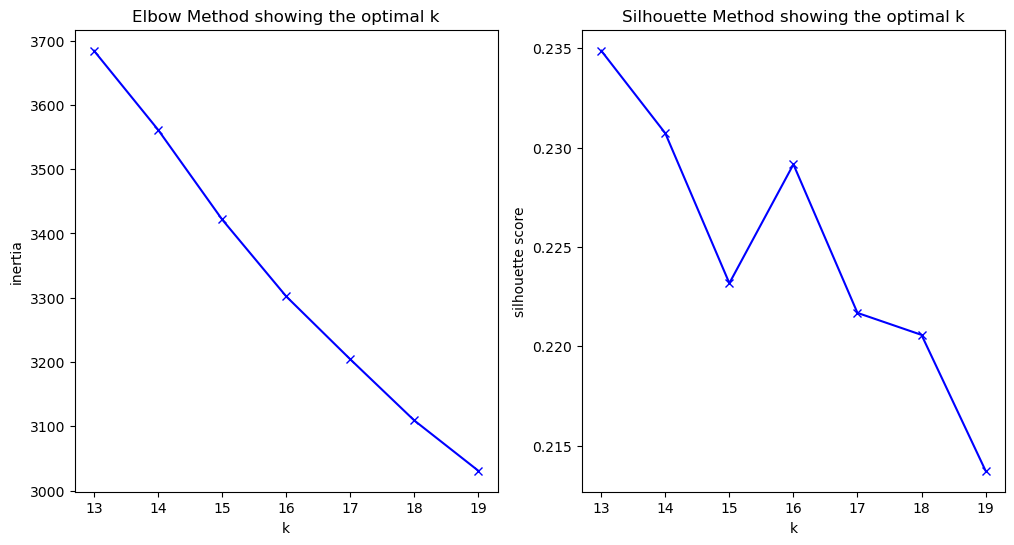

In [23]:
K1 = range(5, 20)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(all_songs2_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle" 
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(all_songs2_scaled_df, kmeans.predict(all_songs2_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

Training a K-Means model with 13 clusters! 

Initialization complete
Iteration 0, inertia 5260.149401789491.
Iteration 1, inertia 4431.133264883349.
Iteration 2, inertia 4163.337790564272.
Iteration 3, inertia 3939.607192536316.
Iteration 4, inertia 3853.7108704674133.
Iteration 5, inertia 3822.309557179606.
Iteration 6, inertia 3804.528505611276.
Iteration 7, inertia 3790.41107025973.
Iteration 8, inertia 3782.9112890616375.
Iteration 9, inertia 3779.8948539079884.
Iteration 10, inertia 3778.39475086767.
Iteration 11, inertia 3776.9876807512355.
Iteration 12, inertia 3775.968358359381.
Iteration 13, inertia 3774.451821770757.
Iteration 14, inertia 3772.5882576770823.
Iteration 15, inertia 3770.8399709269506.
Iteration 16, inertia 3768.6413493307928.
Iteration 17, inertia 3767.96815131702.
Iteration 18, inertia 3767.0790284452714.
Iteration 19, inertia 3765.232532590982.
Iteration 20, inertia 3762.577390793802.
Iteration 21, inertia 3758.1719682366224.
Iteration 22, inertia 3749.837100

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 5095.518588064024.
Iteration 1, inertia 3995.953912502465.
Iteration 2, inertia 3856.0327370256596.
Iteration 3, inertia 3804.8442506576557.
Iteration 4, inertia 3781.2279379470156.
Iteration 5, inertia 3766.7513163037916.
Iteration 6, inertia 3758.202374402361.
Iteration 7, inertia 3753.4567693395566.
Iteration 8, inertia 3749.753921135127.
Iteration 9, inertia 3747.3052016860775.
Iteration 10, inertia 3745.4595601856886.
Iteration 11, inertia 3744.578793545067.
Iteration 12, inertia 3743.5458060356764.
Iteration 13, inertia 3742.1233067921376.
Iteration 14, inertia 3741.0377175880208.
Iteration 15, inertia 3740.0300816691506.
Iteration 16, inertia 3738.7608970531164.
Iteration 17, inertia 3738.1656845955213.
Iteration 18, inertia 3738.0265920805805.
Iteration 19, inertia 3737.9564101276637.
Converged at iteration 19: center shift 8.95467014066347e-05 within tolerance 0.00010000000000000005.
Initialization complete
Iteration 0, inertia 5075

Training a K-Means model with 14 clusters! 

Initialization complete
Iteration 0, inertia 4845.628640935505.
Iteration 1, inertia 4095.8443059773153.
Iteration 2, inertia 3884.760415412205.
Iteration 3, inertia 3797.427462452768.
Iteration 4, inertia 3756.594737924481.
Iteration 5, inertia 3727.4399991263886.
Iteration 6, inertia 3708.598398672112.
Iteration 7, inertia 3693.8232330680103.
Iteration 8, inertia 3683.9707553753933.
Iteration 9, inertia 3678.437099038895.
Iteration 10, inertia 3674.9326610571043.
Iteration 11, inertia 3670.854709226631.
Iteration 12, inertia 3666.503461520547.
Iteration 13, inertia 3663.9158354460633.
Iteration 14, inertia 3661.80179361914.
Iteration 15, inertia 3660.136352099463.
Iteration 16, inertia 3658.702406807945.
Iteration 17, inertia 3658.0190559211514.
Iteration 18, inertia 3657.2480455885648.
Iteration 19, inertia 3656.6139777242606.
Iteration 20, inertia 3655.8721079863703.
Iteration 21, inertia 3655.0718732908.
Iteration 22, inertia 3653.71160

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 41, inertia 3594.65378410451.
Converged at iteration 41: center shift 2.5864709669649152e-05 within tolerance 0.00010000000000000005.
Initialization complete
Iteration 0, inertia 4675.136940043278.
Iteration 1, inertia 3878.7002740544476.
Iteration 2, inertia 3768.9776804814264.
Iteration 3, inertia 3726.838824703733.
Iteration 4, inertia 3697.751147566036.
Iteration 5, inertia 3672.130136811629.
Iteration 6, inertia 3653.8698675959777.
Iteration 7, inertia 3646.1989201526517.
Iteration 8, inertia 3639.411819925617.
Iteration 9, inertia 3634.692758697039.
Iteration 10, inertia 3630.5321045071305.
Iteration 11, inertia 3626.337978338898.
Iteration 12, inertia 3622.5644952699913.
Iteration 13, inertia 3619.747460257413.
Iteration 14, inertia 3618.239122715948.
Iteration 15, inertia 3617.4621060603577.
Iteration 16, inertia 3616.267406518245.
Iteration 17, inertia 3615.143037310845.
Iteration 18, inertia 3614.3632136595716.
Iteration 19, inertia 3613.3397295111677.
Iteration 20,

Training a K-Means model with 15 clusters! 

Initialization complete
Iteration 0, inertia 4668.112455637958.
Iteration 1, inertia 3921.2397202965167.
Iteration 2, inertia 3717.737014932642.
Iteration 3, inertia 3617.0282771798684.
Iteration 4, inertia 3569.1636926500614.
Iteration 5, inertia 3541.5042065436132.
Iteration 6, inertia 3523.1855501076748.
Iteration 7, inertia 3508.5098760460687.
Iteration 8, inertia 3496.554258940409.
Iteration 9, inertia 3490.509351947564.
Iteration 10, inertia 3487.8285351401387.
Iteration 11, inertia 3485.2596632586337.
Iteration 12, inertia 3483.4459750529113.
Iteration 13, inertia 3481.2551944895695.
Iteration 14, inertia 3478.3267614765255.
Iteration 15, inertia 3475.6364015941017.
Iteration 16, inertia 3472.301544530347.
Iteration 17, inertia 3466.807961377876.
Iteration 18, inertia 3461.2494325629837.
Iteration 19, inertia 3458.5263400310137.
Iteration 20, inertia 3457.3466902200034.
Iteration 21, inertia 3455.576282487835.
Iteration 22, inertia 34

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 4837.136137400584.
Iteration 1, inertia 3774.1346252559106.
Iteration 2, inertia 3653.3313530812006.
Iteration 3, inertia 3596.917451393907.
Iteration 4, inertia 3554.7744389609916.
Iteration 5, inertia 3532.8299781550268.
Iteration 6, inertia 3523.0618349797983.
Iteration 7, inertia 3515.473715438419.
Iteration 8, inertia 3509.9397301630206.
Iteration 9, inertia 3505.645744234015.
Iteration 10, inertia 3503.244077601221.
Iteration 11, inertia 3502.315445470569.
Iteration 12, inertia 3501.3936388606307.
Iteration 13, inertia 3500.098696492276.
Iteration 14, inertia 3498.9772381813664.
Iteration 15, inertia 3498.435786089055.
Iteration 16, inertia 3498.148826707675.
Iteration 17, inertia 3497.7888416130145.
Iteration 18, inertia 3497.157820883637.
Iteration 19, inertia 3496.211611872369.
Iteration 20, inertia 3495.006060702005.
Iteration 21, inertia 3494.2344145148018.
Iteration 22, inertia 3493.633431585275.
Iteration 23, inertia 3492.908473

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 18, inertia 3393.647022246701.
Iteration 19, inertia 3391.6532731285524.
Iteration 20, inertia 3389.6602263556015.
Iteration 21, inertia 3388.0676354788284.
Iteration 22, inertia 3386.482917900953.
Iteration 23, inertia 3385.2011943051084.
Iteration 24, inertia 3383.6706672790524.
Iteration 25, inertia 3382.926032890509.
Iteration 26, inertia 3381.780799337491.
Iteration 27, inertia 3380.286994221533.
Iteration 28, inertia 3378.0424072923374.
Iteration 29, inertia 3376.5713424141773.
Iteration 30, inertia 3375.4173626670818.
Iteration 31, inertia 3374.7339258744832.
Iteration 32, inertia 3373.88084627125.
Iteration 33, inertia 3373.6540660978735.
Iteration 34, inertia 3373.4565804507392.
Iteration 35, inertia 3373.3248809990546.
Iteration 36, inertia 3373.2312074715014.
Converged at iteration 36: strict convergence.
Initialization complete
Iteration 0, inertia 4887.7840973958555.
Iteration 1, inertia 3839.1285139661063.
Iteration 2, inertia 3644.0688473866844.
Iteration 3, in

Iteration 13, inertia 3412.751724462572.
Iteration 14, inertia 3411.6417961946627.
Iteration 15, inertia 3411.0331950821665.
Iteration 16, inertia 3410.6279865592487.
Iteration 17, inertia 3410.321540567147.
Iteration 18, inertia 3410.076236902518.
Iteration 19, inertia 3409.9776833231845.
Iteration 20, inertia 3409.8995359995906.
Iteration 21, inertia 3409.857625150781.
Converged at iteration 21: center shift 3.1042479574572605e-05 within tolerance 0.00010000000000000005.
Initialization complete
Iteration 0, inertia 4441.973807386394.
Iteration 1, inertia 3630.8107720694343.
Iteration 2, inertia 3472.669637825589.
Iteration 3, inertia 3410.449573904629.
Iteration 4, inertia 3386.5820899147425.
Iteration 5, inertia 3377.4195973127353.
Iteration 6, inertia 3371.923595247268.
Iteration 7, inertia 3368.382806596025.
Iteration 8, inertia 3365.939118148508.
Iteration 9, inertia 3363.803288881266.
Iteration 10, inertia 3362.8556082767927.
Iteration 11, inertia 3361.6133053013236.
Iteration 1

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 16, inertia 3271.4285106952175.
Iteration 17, inertia 3267.7636692084307.
Iteration 18, inertia 3265.2031112971936.
Iteration 19, inertia 3263.9961940040994.
Iteration 20, inertia 3263.6625172713084.
Iteration 21, inertia 3263.2949281056353.
Iteration 22, inertia 3262.8661225090386.
Iteration 23, inertia 3262.7378501461803.
Iteration 24, inertia 3262.537774919792.
Iteration 25, inertia 3261.5717084827534.
Iteration 26, inertia 3261.1673684561692.
Iteration 27, inertia 3261.1387629780056.
Converged at iteration 27: strict convergence.
Initialization complete
Iteration 0, inertia 4516.961436294612.
Iteration 1, inertia 3584.3306416199584.
Iteration 2, inertia 3454.6804359365556.
Iteration 3, inertia 3401.567931108614.
Iteration 4, inertia 3371.484762346166.
Iteration 5, inertia 3354.0237977153583.
Iteration 6, inertia 3344.8365432693217.
Iteration 7, inertia 3339.70363316946.
Iteration 8, inertia 3337.1598139780335.
Iteration 9, inertia 3335.6903518252248.
Iteration 10, inertia

Iteration 8, inertia 3244.76843980018.
Iteration 9, inertia 3242.29056978909.
Iteration 10, inertia 3238.821353576621.
Iteration 11, inertia 3234.2492916887545.
Iteration 12, inertia 3229.8516179809358.
Iteration 13, inertia 3227.2891109201587.
Iteration 14, inertia 3225.526010682845.
Iteration 15, inertia 3224.522152141686.
Iteration 16, inertia 3223.8979458521326.
Iteration 17, inertia 3222.971399199727.
Iteration 18, inertia 3222.52553627668.
Iteration 19, inertia 3221.8453516392456.
Iteration 20, inertia 3221.609804517202.
Iteration 21, inertia 3221.587095869344.
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia 4303.21809460314.
Iteration 1, inertia 3616.143379660174.
Iteration 2, inertia 3464.8875920971414.
Iteration 3, inertia 3405.155286588071.
Iteration 4, inertia 3373.5897970351107.
Iteration 5, inertia 3348.9645347101714.
Iteration 6, inertia 3331.9833895109323.
Iteration 7, inertia 3321.9176235601735.
Iteration 8, inertia 3314.75695

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 3851.45906477776.
Iteration 1, inertia 3325.889323172598.
Iteration 2, inertia 3265.1901678671125.
Iteration 3, inertia 3239.2702962716544.
Iteration 4, inertia 3227.5756787475207.
Iteration 5, inertia 3219.19167288499.
Iteration 6, inertia 3210.309348870403.
Iteration 7, inertia 3202.3006722973905.
Iteration 8, inertia 3195.1459511329194.
Iteration 9, inertia 3190.6283724188784.
Iteration 10, inertia 3186.412227655918.
Iteration 11, inertia 3182.354993488362.
Iteration 12, inertia 3176.874321998291.
Iteration 13, inertia 3172.4993478605056.
Iteration 14, inertia 3168.406264369052.
Iteration 15, inertia 3164.8246219049884.
Iteration 16, inertia 3161.8813241927623.
Iteration 17, inertia 3159.2532743044585.
Iteration 18, inertia 3156.34648088629.
Iteration 19, inertia 3154.6955850969416.
Iteration 20, inertia 3153.545796594246.
Iteration 21, inertia 3153.0692042122423.
Iteration 22, inertia 3152.623348105984.
Iteration 23, inertia 3151.805339170109.
Iteration 24, ine

Iteration 16, inertia 3212.681045895757.
Iteration 17, inertia 3211.9582351485005.
Iteration 18, inertia 3211.397149334345.
Iteration 19, inertia 3210.98761408108.
Iteration 20, inertia 3210.855942429354.
Iteration 21, inertia 3210.7540951642077.
Iteration 22, inertia 3210.715258349619.
Converged at iteration 22: strict convergence.
Initialization complete
Iteration 0, inertia 4088.0060946351423.
Iteration 1, inertia 3362.9066704125325.
Iteration 2, inertia 3265.706170266817.
Iteration 3, inertia 3233.137280577512.
Iteration 4, inertia 3207.3599052075792.
Iteration 5, inertia 3185.195092165165.
Iteration 6, inertia 3167.2205509895657.
Iteration 7, inertia 3155.056972833712.
Iteration 8, inertia 3147.791273235365.
Iteration 9, inertia 3141.6326873250255.
Iteration 10, inertia 3136.7751300197715.
Iteration 11, inertia 3134.132403514933.
Iteration 12, inertia 3132.431197042316.
Iteration 13, inertia 3131.180618603071.
Iteration 14, inertia 3130.3067933381735.
Iteration 15, inertia 3129.12

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 28, inertia 3059.497028790131.
Iteration 29, inertia 3058.929137083097.
Iteration 30, inertia 3058.4527989016005.
Iteration 31, inertia 3057.901037794688.
Iteration 32, inertia 3057.2228076882893.
Iteration 33, inertia 3056.5130106921933.
Iteration 34, inertia 3056.4474653075476.
Converged at iteration 34: center shift 7.635319142471133e-05 within tolerance 0.00010000000000000005.
Initialization complete
Iteration 0, inertia 4004.5464550636857.
Iteration 1, inertia 3466.445389121844.
Iteration 2, inertia 3369.804479287859.
Iteration 3, inertia 3296.530387392816.
Iteration 4, inertia 3223.2659878839513.
Iteration 5, inertia 3170.3237429231012.
Iteration 6, inertia 3137.2750205253933.
Iteration 7, inertia 3117.9881125590373.
Iteration 8, inertia 3104.4552578945495.
Iteration 9, inertia 3093.1370894230995.
Iteration 10, inertia 3085.0598310263154.
Iteration 11, inertia 3080.5214532199852.
Iteration 12, inertia 3078.082832459126.
Iteration 13, inertia 3075.580992499307.
Iteration

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

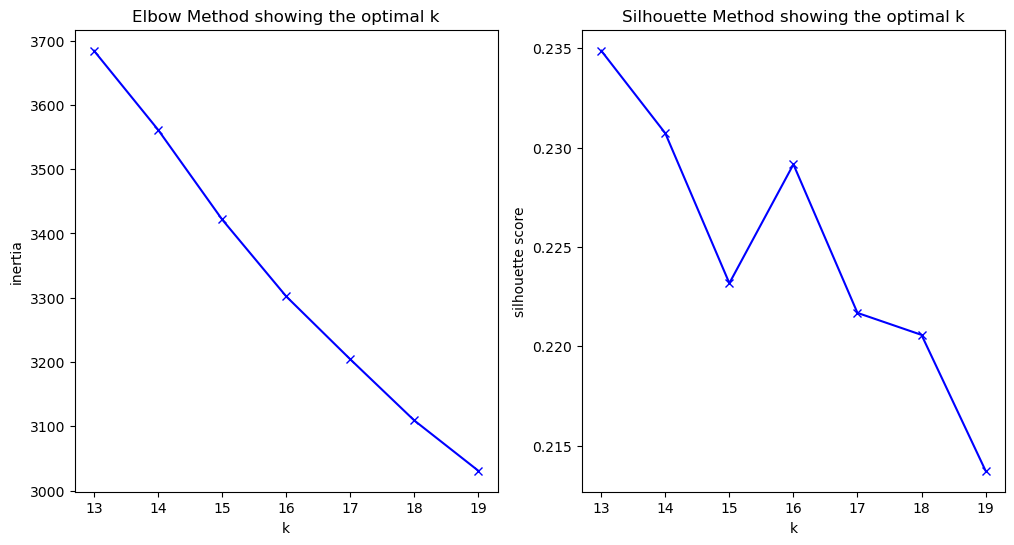

In [34]:
K2 = range(10, 20)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(all_songs2_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle" 
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(all_songs2_scaled_df, kmeans.predict(all_songs2_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

Training a K-Means model with 13 clusters! 

Initialization complete
Iteration 0, inertia 5260.149401789491.
Iteration 1, inertia 4431.133264883349.
Iteration 2, inertia 4163.337790564272.
Iteration 3, inertia 3939.607192536316.
Iteration 4, inertia 3853.710870467413.
Iteration 5, inertia 3822.3095571796066.
Iteration 6, inertia 3804.528505611276.
Iteration 7, inertia 3790.41107025973.
Iteration 8, inertia 3782.9112890616375.
Iteration 9, inertia 3779.8948539079884.
Iteration 10, inertia 3778.39475086767.
Iteration 11, inertia 3776.9876807512355.
Iteration 12, inertia 3775.9683583593815.
Iteration 13, inertia 3774.451821770757.
Iteration 14, inertia 3772.588257677082.
Iteration 15, inertia 3770.8399709269506.
Iteration 16, inertia 3768.6413493307923.
Iteration 17, inertia 3767.96815131702.
Iteration 18, inertia 3767.0790284452714.
Iteration 19, inertia 3765.232532590982.
Iteration 20, inertia 3762.577390793802.
Iteration 21, inertia 3758.1719682366224.
Iteration 22, inertia 3749.837100

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 17, inertia 3744.5311942940552.
Iteration 18, inertia 3743.7889151127515.
Iteration 19, inertia 3742.393071943301.
Iteration 20, inertia 3740.9834510486307.
Iteration 21, inertia 3739.7878160195623.
Iteration 22, inertia 3738.8816784647984.
Iteration 23, inertia 3738.4208839638204.
Iteration 24, inertia 3738.162880116448.
Iteration 25, inertia 3738.0109931730058.
Iteration 26, inertia 3737.899722329471.
Iteration 27, inertia 3737.8356215833137.
Iteration 28, inertia 3737.7958777307185.
Converged at iteration 28: strict convergence.
Initialization complete
Iteration 0, inertia 4842.5144986566975.
Iteration 1, inertia 4121.105043685244.
Iteration 2, inertia 4043.017399333341.
Iteration 3, inertia 3998.1111630527016.
Iteration 4, inertia 3943.824175815689.
Iteration 5, inertia 3882.603419404131.
Iteration 6, inertia 3840.9240140482375.
Iteration 7, inertia 3823.713252699265.
Iteration 8, inertia 3815.522146555085.
Iteration 9, inertia 3809.0120390919205.
Iteration 10, inertia 38

Iteration 31, inertia 3697.087782855327.
Iteration 32, inertia 3696.471559108615.
Iteration 33, inertia 3696.0304111873697.
Iteration 34, inertia 3695.4925629272493.
Iteration 35, inertia 3694.6787667708213.
Iteration 36, inertia 3693.808818965783.
Iteration 37, inertia 3692.8881401349004.
Iteration 38, inertia 3691.720256796862.
Iteration 39, inertia 3690.470229404229.
Iteration 40, inertia 3689.11717943316.
Iteration 41, inertia 3688.20892707214.
Iteration 42, inertia 3687.2294802000974.
Iteration 43, inertia 3686.261139887263.
Iteration 44, inertia 3685.6115894435106.
Iteration 45, inertia 3685.1432471512053.
Iteration 46, inertia 3684.911024829363.
Iteration 47, inertia 3684.659416331032.
Iteration 48, inertia 3684.3575194865743.
Iteration 49, inertia 3684.2536956792164.
Converged at iteration 49: center shift 1.9200862590139317e-05 within tolerance 0.00010000000000000005.
Initialization complete
Iteration 0, inertia 5145.225839696857.
Iteration 1, inertia 4093.420359119541.
Iterat

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 16, inertia 3628.9571507423634.
Iteration 17, inertia 3627.2429513971565.
Iteration 18, inertia 3625.6974439481664.
Iteration 19, inertia 3624.1010996741725.
Iteration 20, inertia 3623.2923190311167.
Iteration 21, inertia 3622.3879808895736.
Iteration 22, inertia 3621.6720886589233.
Iteration 23, inertia 3621.077318282889.
Iteration 24, inertia 3619.689524085061.
Iteration 25, inertia 3618.3607481202985.
Iteration 26, inertia 3615.8155234624064.
Iteration 27, inertia 3613.077187203736.
Iteration 28, inertia 3607.946504651215.
Iteration 29, inertia 3602.8994233574094.
Iteration 30, inertia 3600.1182573375772.
Iteration 31, inertia 3599.1217903872302.
Iteration 32, inertia 3598.0200990431736.
Iteration 33, inertia 3597.148993937787.
Iteration 34, inertia 3596.817731551418.
Iteration 35, inertia 3596.4806583970576.
Iteration 36, inertia 3596.0286200714363.
Iteration 37, inertia 3595.835462911802.
Iteration 38, inertia 3595.3832446500114.
Iteration 39, inertia 3594.9433152130523.

Training a K-Means model with 15 clusters! 

Initialization complete
Iteration 0, inertia 4668.112455637958.
Iteration 1, inertia 3921.2397202965167.
Iteration 2, inertia 3717.737014932642.
Iteration 3, inertia 3617.028277179868.
Iteration 4, inertia 3569.163692650062.
Iteration 5, inertia 3541.5042065436132.
Iteration 6, inertia 3523.1855501076748.
Iteration 7, inertia 3508.5098760460687.
Iteration 8, inertia 3496.554258940409.
Iteration 9, inertia 3490.509351947564.
Iteration 10, inertia 3487.8285351401387.
Iteration 11, inertia 3485.2596632586337.
Iteration 12, inertia 3483.4459750529113.
Iteration 13, inertia 3481.2551944895695.
Iteration 14, inertia 3478.3267614765255.
Iteration 15, inertia 3475.6364015941017.
Iteration 16, inertia 3472.301544530347.
Iteration 17, inertia 3466.8079613778764.
Iteration 18, inertia 3461.249432562984.
Iteration 19, inertia 3458.526340031014.
Iteration 20, inertia 3457.346690220003.
Iteration 21, inertia 3455.576282487835.
Iteration 22, inertia 3454.3

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 33, inertia 3487.8865736123735.
Iteration 34, inertia 3487.5661367879948.
Iteration 35, inertia 3487.0645165589362.
Iteration 36, inertia 3485.27180359376.
Iteration 37, inertia 3483.0874246496883.
Iteration 38, inertia 3481.763667101787.
Iteration 39, inertia 3480.3329509967.
Iteration 40, inertia 3479.4502657500198.
Iteration 41, inertia 3478.6381389323133.
Iteration 42, inertia 3478.074124727899.
Iteration 43, inertia 3477.9577642024897.
Iteration 44, inertia 3477.9283572997942.
Converged at iteration 44: strict convergence.
Initialization complete
Iteration 0, inertia 4587.700810298104.
Iteration 1, inertia 3664.4073211451782.
Iteration 2, inertia 3520.191780748153.
Iteration 3, inertia 3465.709019402474.
Iteration 4, inertia 3447.6259834713455.
Iteration 5, inertia 3437.9964616350603.
Iteration 6, inertia 3431.691092130893.
Iteration 7, inertia 3428.0101981570497.
Iteration 8, inertia 3425.88356058549.
Iteration 9, inertia 3424.250624576613.
Iteration 10, inertia 3423.14

Training a K-Means model with 16 clusters! 

Initialization complete
Iteration 0, inertia 4546.293578725866.
Iteration 1, inertia 3795.2915606250535.
Iteration 2, inertia 3618.839653427838.
Iteration 3, inertia 3551.644543871449.
Iteration 4, inertia 3511.8916944509065.
Iteration 5, inertia 3483.107430484126.
Iteration 6, inertia 3462.5386389043924.
Iteration 7, inertia 3445.4014188304704.
Iteration 8, inertia 3434.169080745877.
Iteration 9, inertia 3427.3751668076366.
Iteration 10, inertia 3423.491157499003.
Iteration 11, inertia 3420.1246472024673.
Iteration 12, inertia 3416.368203869356.
Iteration 13, inertia 3412.5896959551874.
Iteration 14, inertia 3408.358382333392.
Iteration 15, inertia 3403.3058933252614.
Iteration 16, inertia 3398.107049763826.
Iteration 17, inertia 3395.727984308417.
Iteration 18, inertia 3393.6470222467005.
Iteration 19, inertia 3391.6532731285524.
Iteration 20, inertia 3389.6602263556015.
Iteration 21, inertia 3388.0676354788284.
Iteration 22, inertia 3386.

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 9, inertia 3418.5168242211694.
Iteration 10, inertia 3394.3648785723626.
Iteration 11, inertia 3377.4576598150848.
Iteration 12, inertia 3364.5847447345986.
Iteration 13, inertia 3355.349940694438.
Iteration 14, inertia 3348.546665554928.
Iteration 15, inertia 3341.2185393731656.
Iteration 16, inertia 3336.090695418924.
Iteration 17, inertia 3333.423899020599.
Iteration 18, inertia 3331.3314709827046.
Iteration 19, inertia 3329.737655465282.
Iteration 20, inertia 3328.358807601886.
Iteration 21, inertia 3326.8802820185883.
Iteration 22, inertia 3325.5075245436374.
Iteration 23, inertia 3324.0839218023084.
Iteration 24, inertia 3322.9951627041764.
Iteration 25, inertia 3321.622678010779.
Iteration 26, inertia 3320.262416928779.
Iteration 27, inertia 3319.305383924463.
Iteration 28, inertia 3318.597309701814.
Iteration 29, inertia 3318.1657032045578.
Iteration 30, inertia 3317.7453149947123.
Iteration 31, inertia 3317.291565170595.
Iteration 32, inertia 3316.9552305132356.
Iter

Iteration 18, inertia 3350.980508228424.
Iteration 19, inertia 3349.7216851301037.
Iteration 20, inertia 3348.3073113377377.
Iteration 21, inertia 3346.1991637688216.
Iteration 22, inertia 3344.391336631202.
Iteration 23, inertia 3343.049572567726.
Iteration 24, inertia 3341.223409530945.
Iteration 25, inertia 3340.288050660556.
Iteration 26, inertia 3339.650473118183.
Iteration 27, inertia 3339.3728805349647.
Iteration 28, inertia 3339.0200459701296.
Iteration 29, inertia 3338.507704549183.
Iteration 30, inertia 3337.92451833658.
Iteration 31, inertia 3337.5180500272827.
Iteration 32, inertia 3337.1168893811982.
Iteration 33, inertia 3336.7003269593097.
Iteration 34, inertia 3336.3694174034713.
Iteration 35, inertia 3335.231566005931.
Iteration 36, inertia 3333.5415445087338.
Iteration 37, inertia 3332.4074379456515.
Iteration 38, inertia 3331.577143524009.
Iteration 39, inertia 3330.535462240665.
Iteration 40, inertia 3328.4160228679293.
Iteration 41, inertia 3326.5151340768616.
Iter

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 4516.961436294612.
Iteration 1, inertia 3584.3306416199584.
Iteration 2, inertia 3454.6804359365556.
Iteration 3, inertia 3401.567931108614.
Iteration 4, inertia 3371.484762346166.
Iteration 5, inertia 3354.023797715358.
Iteration 6, inertia 3344.8365432693217.
Iteration 7, inertia 3339.70363316946.
Iteration 8, inertia 3337.1598139780335.
Iteration 9, inertia 3335.6903518252248.
Iteration 10, inertia 3334.8591856887324.
Iteration 11, inertia 3334.4014994023373.
Iteration 12, inertia 3334.2481958643248.
Converged at iteration 12: center shift 9.466093493806828e-05 within tolerance 0.00010000000000000005.
Initialization complete
Iteration 0, inertia 4486.78487870745.
Iteration 1, inertia 3732.981707592434.
Iteration 2, inertia 3555.45749150174.
Iteration 3, inertia 3468.285406925921.
Iteration 4, inertia 3410.0807238260086.
Iteration 5, inertia 3363.3481770185476.
Iteration 6, inertia 3315.408053932766.
Iteration 7, inertia 3287.123370766434.
Iteration 8, inertia 32

Iteration 20, inertia 3303.452056653336.
Iteration 21, inertia 3303.1130696141618.
Iteration 22, inertia 3302.154983341877.
Iteration 23, inertia 3301.281615873178.
Iteration 24, inertia 3300.8048503007394.
Iteration 25, inertia 3300.6387287577863.
Iteration 26, inertia 3300.43929155536.
Iteration 27, inertia 3300.291688100765.
Iteration 28, inertia 3300.072124154153.
Iteration 29, inertia 3299.8242947554463.
Iteration 30, inertia 3299.524006799346.
Iteration 31, inertia 3299.283167148932.
Iteration 32, inertia 3299.196977719212.
Iteration 33, inertia 3299.1294794775026.
Iteration 34, inertia 3298.8823383340714.
Iteration 35, inertia 3298.4910656376737.
Iteration 36, inertia 3298.1370532669603.
Iteration 37, inertia 3297.946795333077.
Iteration 38, inertia 3297.7052679895573.
Iteration 39, inertia 3297.445092543581.
Iteration 40, inertia 3297.335643290852.
Iteration 41, inertia 3297.2741678969296.
Iteration 42, inertia 3297.2269959810674.
Iteration 43, inertia 3297.1572023385397.
Itera

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 11, inertia 3274.8910944134605.
Iteration 12, inertia 3262.82050875836.
Iteration 13, inertia 3252.9918697043327.
Iteration 14, inertia 3244.9365775873684.
Iteration 15, inertia 3240.45884784684.
Iteration 16, inertia 3238.502638205835.
Iteration 17, inertia 3236.315701060612.
Iteration 18, inertia 3235.013122444794.
Iteration 19, inertia 3233.573055774981.
Iteration 20, inertia 3231.6563122320113.
Iteration 21, inertia 3230.0497169286014.
Iteration 22, inertia 3227.4550500116293.
Iteration 23, inertia 3226.0423797837875.
Iteration 24, inertia 3223.091530189289.
Iteration 25, inertia 3218.9839934846113.
Iteration 26, inertia 3215.0906273436667.
Iteration 27, inertia 3213.580845306201.
Iteration 28, inertia 3213.05211753534.
Iteration 29, inertia 3212.17800379393.
Iteration 30, inertia 3211.3891595534815.
Iteration 31, inertia 3211.0923756775264.
Iteration 32, inertia 3210.7750178507595.
Iteration 33, inertia 3210.4735294483044.
Iteration 34, inertia 3210.264958192197.
Iterati

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 44, inertia 3052.365348305677.
Iteration 45, inertia 3051.4601726102483.
Iteration 46, inertia 3050.9354971083353.
Iteration 47, inertia 3050.705188094077.
Iteration 48, inertia 3050.482664259878.
Iteration 49, inertia 3050.371621567165.
Iteration 50, inertia 3050.344725976691.
Converged at iteration 50: strict convergence.
Initialization complete
Iteration 0, inertia 4215.980049643376.
Iteration 1, inertia 3555.7136431057165.
Iteration 2, inertia 3399.106107764679.
Iteration 3, inertia 3320.876136605032.
Iteration 4, inertia 3248.0928859821224.
Iteration 5, inertia 3204.8346934476504.
Iteration 6, inertia 3173.99937753263.
Iteration 7, inertia 3149.5976635584.
Iteration 8, inertia 3134.0075045779895.
Iteration 9, inertia 3121.6743307798083.
Iteration 10, inertia 3111.714724546702.
Iteration 11, inertia 3105.812076013059.
Iteration 12, inertia 3100.7416159083186.
Iteration 13, inertia 3095.97792172977.
Iteration 14, inertia 3092.363303879466.
Iteration 15, inertia 3087.074875

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

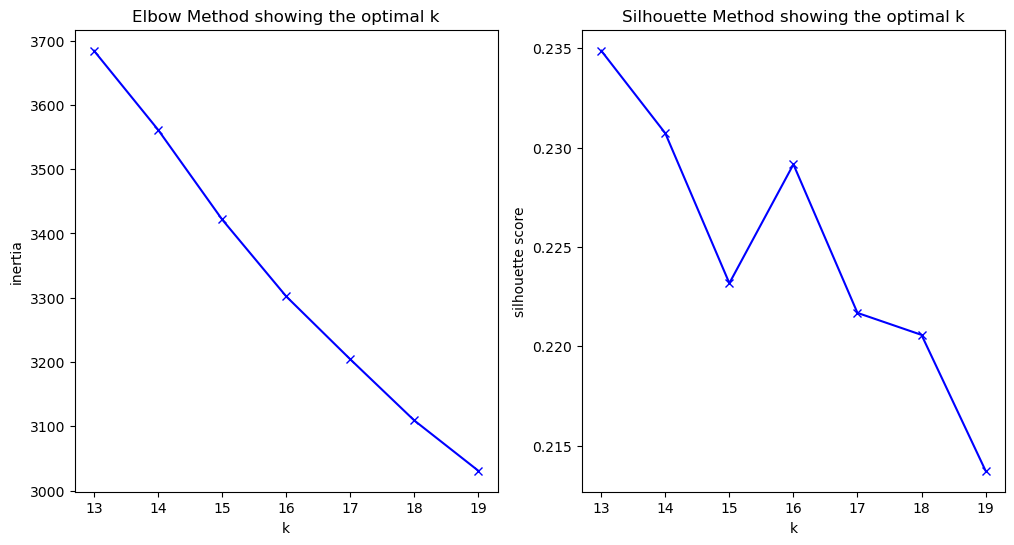

In [25]:
K3 = range(13, 20)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(all_songs2_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle" 
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(all_songs2_scaled_df, kmeans.predict(all_songs2_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [27]:
print(len(K1))
print(len(inertia))
print(len(silhouette))

15
7
7


In [37]:
kmeans = KMeans(n_clusters=13, random_state=1234)
kmeans.fit(all_songs2_scaled_df)

/Users/aryasheth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=13, random_state=1234)

In [38]:
clusters = kmeans.predict(all_songs2_scaled_df)
pd.Series(clusters).value_counts().sort_index()

0     329
1     382
2     177
3     325
4     184
5     118
6     237
7     375
8     191
9     147
10    301
11    217
12    114
dtype: int64

In [39]:
all_songs2["cluster"] = clusters
all_songs2.head()

,danceability,energy,acousticness,instrumentalness,tempo,cluster
0,0.511,0.532,0.1690,0.000000,137.827,1
1,0.517,0.675,0.4590,0.000000,203.853,10
2,0.712,0.603,0.1860,0.000000,97.994,0
3,0.801,0.806,0.3820,0.000669,106.999,0
4,0.707,0.681,0.0632,0.000005,117.999,1


In [40]:
all_songs2[all_songs2['cluster'] == 0]

,danceability,energy,acousticness,instrumentalness,tempo,cluster
2,0.712,0.603,0.186000,0.000000,97.994,0
3,0.801,0.806,0.382000,0.000669,106.999,0
8,0.615,0.616,0.062300,0.000000,89.977,0
9,0.816,0.367,0.314000,0.000000,116.035,0
11,0.644,0.735,0.052100,0.144000,88.980,0
...,...,...,...,...,...,...
3065,0.563,0.491,0.107000,0.000012,115.168,0
3068,0.701,0.805,0.050200,0.000000,81.815,0
3083,0.663,0.715,0.021100,0.000026,77.024,0
3089,0.835,0.948,0.127000,0.018500,89.993,0


In [41]:
clustered_songs = all_songs.copy()
clustered_songs["cluster"] = clusters
clustered_songs[clustered_songs['cluster'] == 0]

,id,titles,artists,danceability,energy,acousticness,instrumentalness,tempo,dataset,cluster
2,1Lo0QY9cvc8sUB2vnIOxDT,Fast Car,Luke Combs,0.712,0.603,0.186000,0.000000,97.994,H,0
3,0WtM2NBVQNNJLh6scP13H8,Calm Down,Rema & Selena Gomez,0.801,0.806,0.382000,0.000669,106.999,H,0
8,4i6cwNY6oIUU2XZxPIw82Y,Karma,Taylor Swift Featuring Ice Spice,0.615,0.616,0.062300,0.000000,89.977,H,0
9,1SRw5p2lVAi7RGlHEmZg66,Favorite Song,Toosii,0.816,0.367,0.314000,0.000000,116.035,H,0
11,1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,SZA,0.644,0.735,0.052100,0.144000,88.980,H,0
...,...,...,...,...,...,...,...,...,...,...
3065,0S9AFS59r41nKlBZ49vlTg,Baby,GB Leighton,0.563,0.491,0.107000,0.000012,115.168,N,0
3068,1XnzzZD8ojdnllg12JyGXJ,Hellrazer,Mastamind / Natas,0.701,0.805,0.050200,0.000000,81.815,N,0
3083,0bSLDuIIIGla6l9C9DIXqP,Choose,"""Why Dont We""",0.663,0.715,0.021100,0.000026,77.024,N,0
3089,41sBUuEdj1awmE0OxFCZtG,Not Too Late,40831,0.835,0.948,0.127000,0.018500,89.993,N,0


In [42]:
clustered_songs = all_songs.copy()
clustered_songs["cluster"] = clusters
clustered_songs[clustered_songs['cluster'] == 1]

,id,titles,artists,danceability,energy,acousticness,instrumentalness,tempo,dataset,cluster
0,3k79jB4aGmMDUQzEwa46Rz,Vampire,Olivia Rodrigo,0.511,0.532,0.1690,0.000000,137.827,H,1
4,0yLdNVWF3Srea0uzk55zFn,Flowers,Miley Cyrus,0.707,0.681,0.0632,0.000005,117.999,H,1
5,6HgWWaMu31KdOpEG5l28BG,All My Life,Lil Durk Featuring J. Cole,0.829,0.436,0.1500,0.000000,143.031,H,1
7,4rXLjWdF2ZZpXCVTfWcshS,Fukumean,Gunna,0.847,0.622,0.1190,0.000000,130.001,H,1
10,4daEMLSZCgZ2Mt7gNm2SRa,Flooded The Face,Lil Uzi Vert,0.640,0.609,0.4920,0.000002,131.889,H,1
...,...,...,...,...,...,...,...,...,...,...
3067,6MVrAVs02ttXXvAhw6DOPD,Я за тебя умру (Disco-Версия),Philipp Kirkorov,0.621,0.963,0.0145,0.000007,123.987,N,1
3077,5M9urPA8G6ogiqaEwGSqua,Snow is Falling in Manhattan,Purple Mountains,0.538,0.417,0.2410,0.305000,131.192,N,1
3082,1xLoMdHVTVxSfobRKcHJiz,The One (feat.Nadia Ali),iio and Nadia Ali,0.746,0.706,0.0185,0.008000,132.993,N,1
3087,7COTCSoeHzjd0cmKBIBJhf,My Pretty Baby (Web 1106),Ernie Williams,0.553,0.752,0.6250,0.000000,128.476,N,1


In [44]:
pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=all_songs2.columns[:-1])

,danceability,energy,acousticness,instrumentalness,tempo
0,0.718809,0.636559,0.187591,0.020635,97.228827
1,0.676853,0.682586,0.181533,0.022010,137.000024
2,0.531169,0.308227,0.869627,0.829424,105.401192
3,0.630520,0.356492,0.738203,0.024998,109.606425
4,0.681951,0.687891,0.156169,0.791076,120.673130
5,0.407809,0.809407,0.100001,0.763432,162.465712
6,0.321074,0.195636,0.859826,0.033528,87.133097
7,0.457269,0.782859,0.107220,0.033496,103.158797
8,0.383380,0.285963,0.773618,0.045307,149.116372
9,0.337212,0.196264,0.866259,0.832143,142.298231


In [45]:
clustered_songs = all_songs.copy()
clustered_songs["cluster"] = clusters
clustered_songs[clustered_songs['cluster'] == 12]

,id,titles,artists,danceability,energy,acousticness,instrumentalness,tempo,dataset,cluster
126,6CXa131hDebDAmrwNSzR3i,How to Act,D.R.I.,0.384,0.837,0.035300,0.772,116.375,N,12
132,19r53ruwKkRG9pcf47NVGy,Final Stretch,Bright Channel,0.344,0.853,0.000267,0.561,99.250,N,12
167,0KArwtnqYEvfhJI27FibQb,Static - Flux (Happy Piano Mix),Static,0.541,0.635,0.071400,0.724,84.979,N,12
197,1rKLz4vZZOC22bHHcmuAf4,Descension,Unwound,0.384,0.890,0.000092,0.744,112.453,N,12
202,60EjIBzz6sH5DwrGUM7ZHl,Is It The Right Way,Les Thugs,0.237,0.789,0.000097,0.852,125.319,N,12
...,...,...,...,...,...,...,...,...,...,...
2892,2iwrVRlzBcoSHmA3R3HLLM,Take It All,Iceage,0.386,0.712,0.000031,0.429,112.200,N,12
2973,5zHnbllJbn6DBcl1t0xA8V,Let's Go,Young Ax,0.530,0.978,0.000702,0.873,85.972,N,12
3004,0i9cLDxSLbXbu57XZ7H2Wb,Smashing the Antiu,Nile,0.273,0.950,0.000002,0.846,111.717,N,12
3016,5xQYW2R5DjlLYRR90yGVES,Knockin' on!! instrumental - Instrumental,halca,0.538,0.917,0.000066,0.879,92.510,N,12
